## **animals_wordcloud.ipynb**

### Create a banner for the Readme file using WordCloud

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/data_clean.csv')
df.head()

,PetType,Breed,AgeMonths,Colour,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeInYears
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,10.916667
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,6.083333
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,11.333333
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,8.083333
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,10.250000


In [4]:
# get animals and breeds text from data
animals_breeds = df[['PetType','Breed','Colour']].astype(str).values
animals_breeds

array([['Bird', 'Parakeet', 'Orange'],
       ['Rabbit', 'Rabbit', 'White'],
       ['Dog', 'Golden Retriever', 'Orange'],
       ...,
       ['Rabbit', 'Rabbit', 'Orange'],
       ['Dog', 'Labrador', 'Gray'],
       ['Rabbit', 'Rabbit', 'White']], dtype=object)

In [5]:
# rabbit breed is not breed, it is just rabbit again, this will skew the wordcloud
# chatgpt was used to generate the following code to clean breed names for rabbits
df["Breed_clean"] = df["Breed"]
mask = (df["PetType"].str.lower() == "rabbit") & (df["Breed"].str.lower() == "rabbit")
df.loc[mask, "Breed_clean"] = ""

In [8]:
# get cleaned animals and breeds text from data
animals_breeds_clean = df[['PetType','Breed_clean','Colour']].astype(str).values
animals_breeds_clean


array([['Bird', 'Parakeet', 'Orange'],
       ['Rabbit', '', 'White'],
       ['Dog', 'Golden Retriever', 'Orange'],
       ...,
       ['Rabbit', '', 'Orange'],
       ['Dog', 'Labrador', 'Gray'],
       ['Rabbit', '', 'White']], dtype=object)

In [18]:
# generate wordcloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Purples",
    collocations=False,
    stopwords=STOPWORDS,
).generate(" ".join(animals_breeds_clean.flatten()))

In [20]:
# save wordcloud to file
wordcloud.to_file("../images/animals_wordcloud.png")  

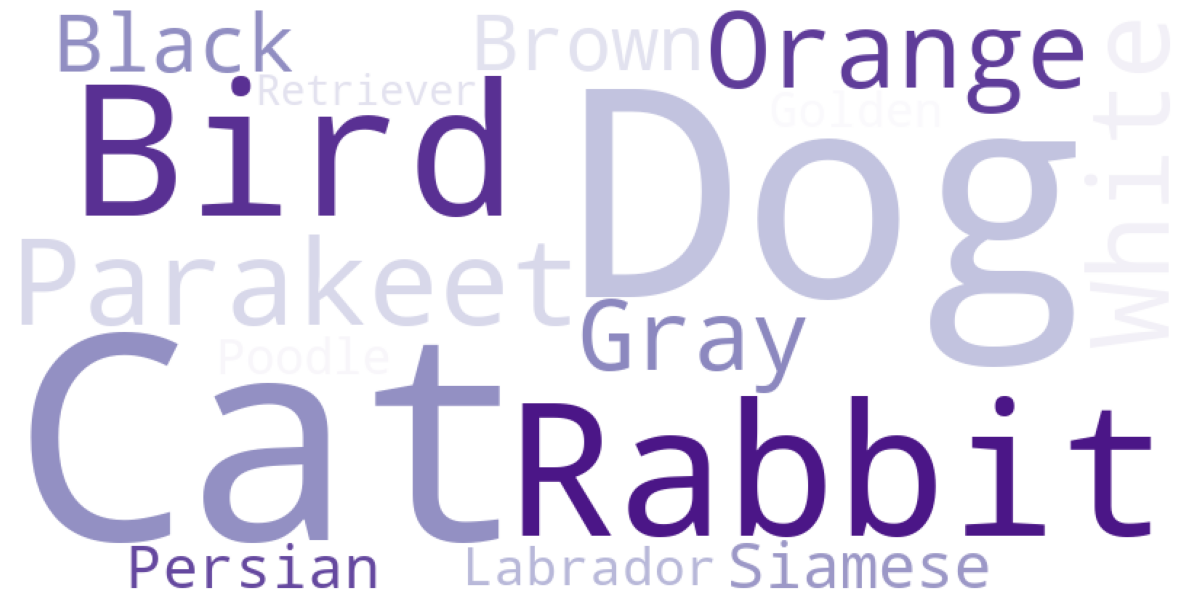

In [19]:
# display wordcloud
plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()